## Explore The Data: Plot Continuous Features

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class (1st, 2nd, or 3rd)
- **Sex** (str) - Gender of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**This section focuses on exploring the `Pclass`, `Age`, `SibSp`, `Parch`, and `Fare` features.**

### Read In Data

In [5]:
# Read in our data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

titanic_df = pd.read_csv('../Data/titanic.csv', usecols=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


### Plot Continuous Features

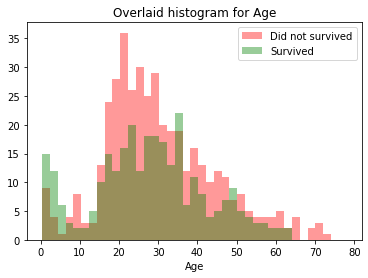

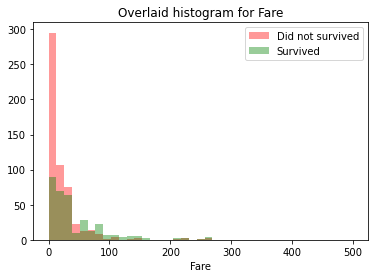

In [11]:
# Plot overlaid histograms for continuous features (Age, Fare)
for i in ['Age', 'Fare']:
    # grab the non null rows only for each features, by survived and non-survived groups
    died = list(titanic_df[titanic_df['Survived'] == 0][i].dropna())
    survived = list(titanic_df[titanic_df['Survived'] == 1][i].dropna())
    
    # define bin size
    xmin = min(min(survived), min(died))
    xmax = max(max(survived), max(died))
    width = (xmax - xmin) / 40
    
    #plot the distribution
    sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Did not survived', 'Survived'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.xlabel(i)
    plt.show()

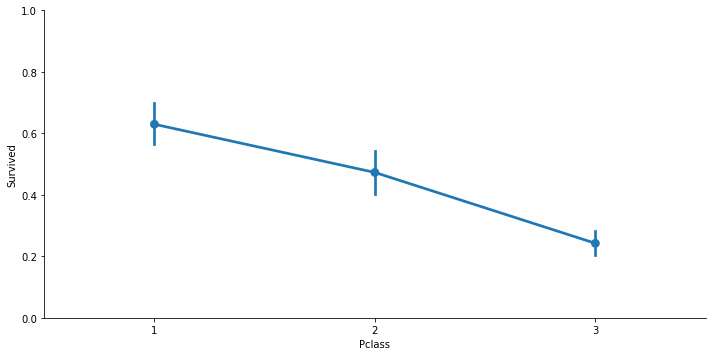

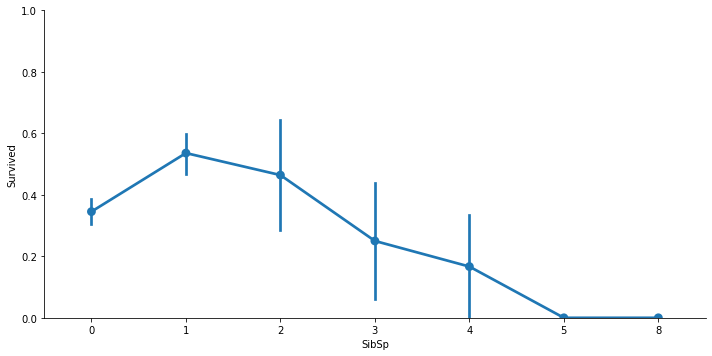

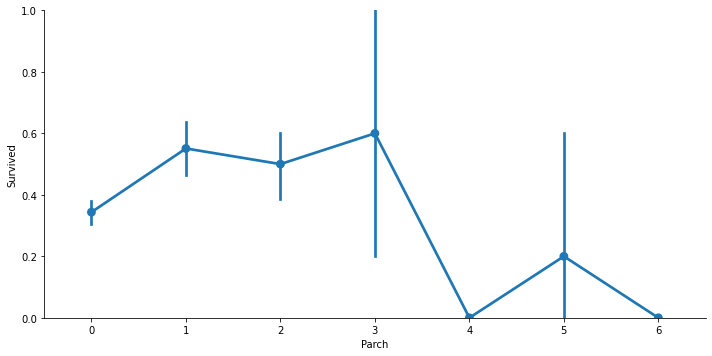

In [13]:
# Generate categorical plots for ordinal features
for col in ['Pclass', 'SibSp', 'Parch']:
    sns.catplot(x=col, y='Survived', data=titanic_df, kind='point', aspect=2)
    plt.ylim(0, 1) #space for y

- points on each graph represent % of survived people
- vertical bar represents the errors. If there are a lot of data for a given level, the vertical bar will be small indicating that we are confident. if we have limited date, the vertical bar will large.

### Features
- we can see on the above graph, 1st class on people are more likely to surived than 2nd and 3rd class.
- for SibSp, the less we have, the more likely to survive too.
- similar trend for Parch.
- For both SibSp and Parch are indicating family members. Anytime we can condense features down, we should. it just gives model less things to look through. so we will combine those 2 and explore further.

In [14]:
# Create a new family count feature
titanic_df['Family_cnt'] = titanic_df['SibSp'] + titanic_df['Parch']

(0.0, 1.0)

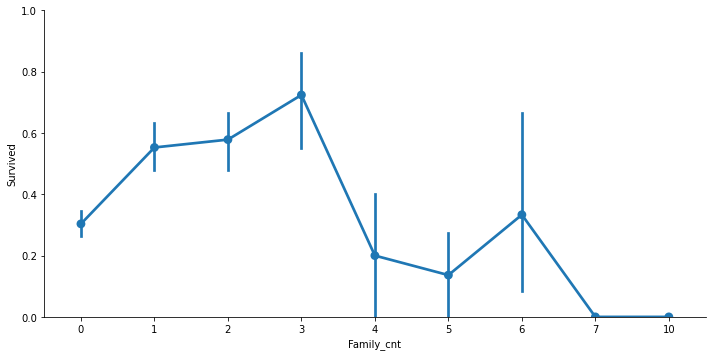

In [16]:
# let's explore with category plot
sns.catplot(x='Family_cnt', y='Survived', data=titanic_df, kind='point', aspect=2)
plt.ylim(0,1)

Aftering combing the features, we can see that the fewer family members, the more likely the survival is. But why there is a strong indicator at `3` family members as cut off point? We might want to deep a little deeper and might not want to make untested hypothesis. 